In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Lets get the data

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [ ]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
# Let's check the Labels in the data

pd.Series(y_train).unique()

array([9, 0, 3, 2, 7, 5, 1, 6, 4, 8], dtype=uint8)

In [ ]:
label_names = ['T-shirt/Top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneakers',
               'Bag',
               'Ankle Boot']

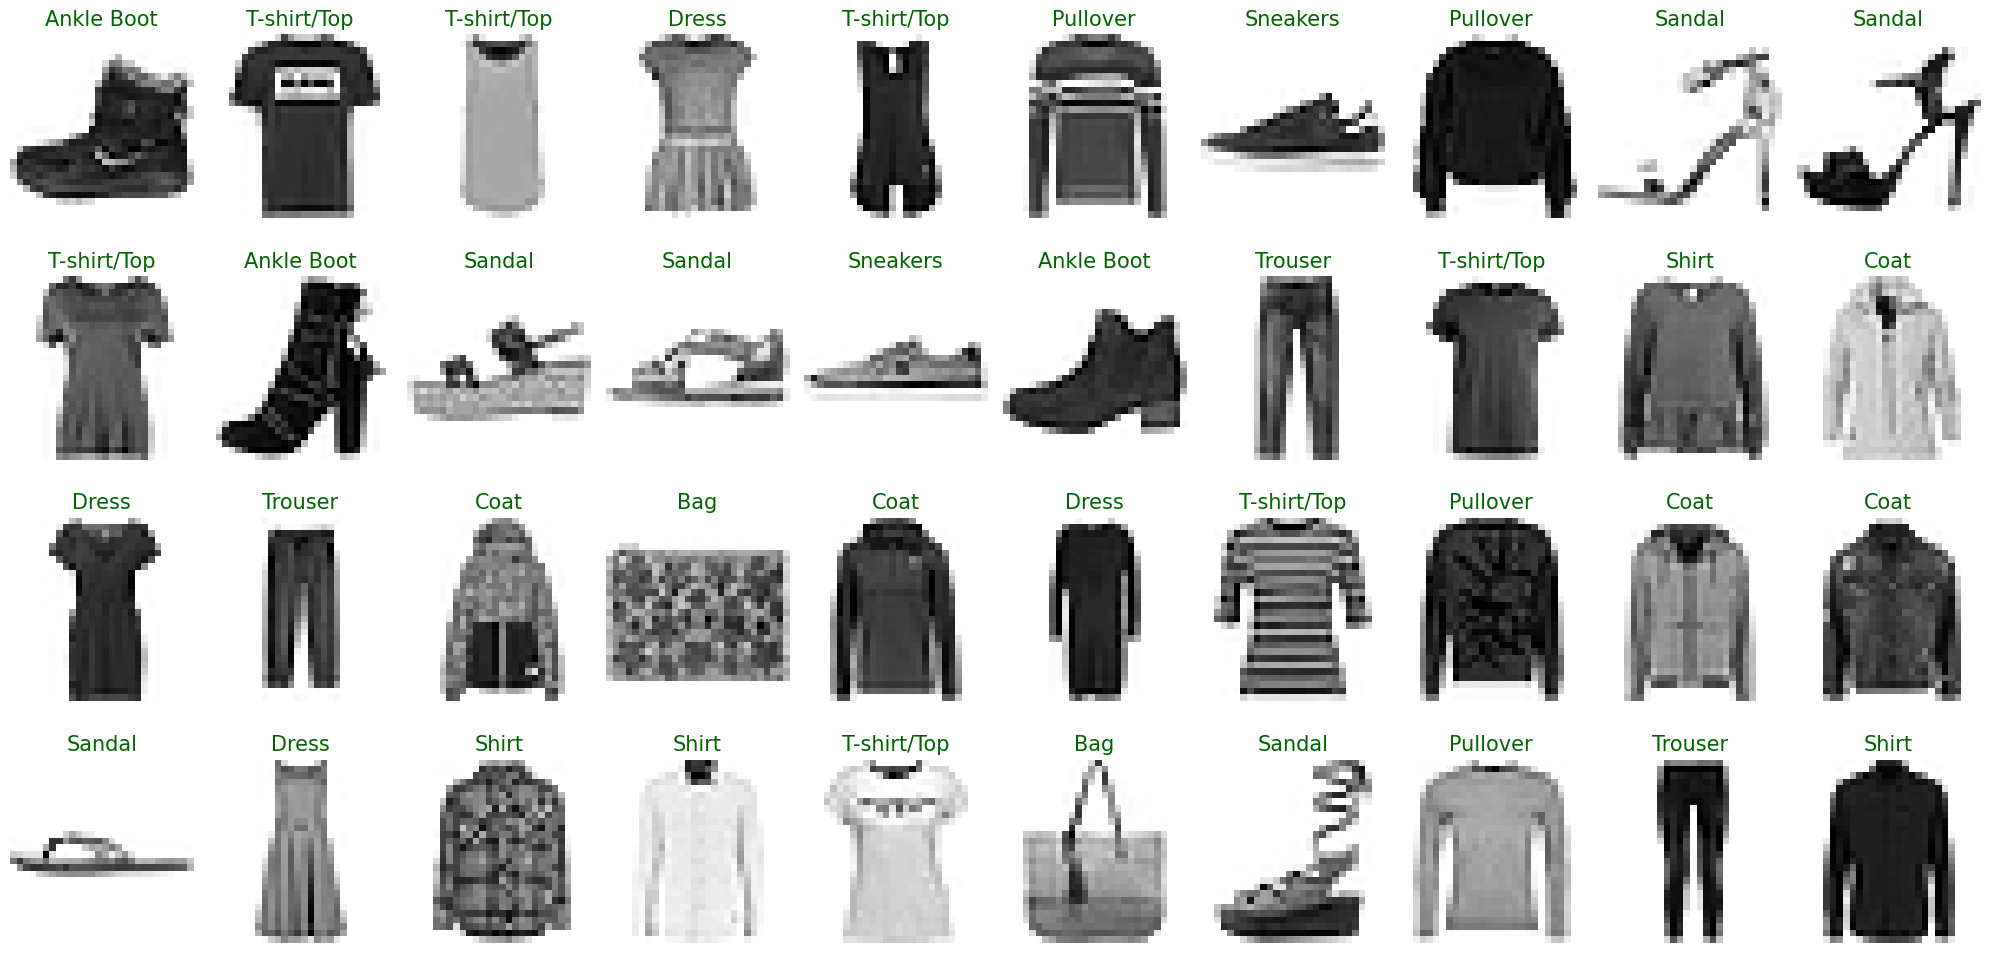

In [ ]:
# See the images

nrows = 4
ncols = 10
t = 1
plt.figure(figsize=(20,10))
for i in range(nrows*ncols):
  plt.subplot(nrows,ncols,t)
  plt.imshow(x_train[i],cmap='binary')
  plt.title(f'{label_names[y_train[i]]}',color='darkgreen',fontsize=15)
  plt.axis('off')
  t+=1
plt.tight_layout()
plt.show()

## Data Preprocessing

In [ ]:
# First lets scale the data

x_train_s = x_train/255
x_test_s = x_test/255

In [ ]:
x_train.min(),x_train.max()

(np.uint8(0), np.uint8(255))

In [ ]:
x_train_s.min(),x_train_s.max()

(np.float64(0.0), np.float64(1.0))

Inference: Data has been scaled

In [ ]:
# We have 3D data

x_train.ndim

3

In [ ]:
# Reshape the data from 3D to 2D
# 60000 x 28 x28 --> 60000 x 784 (train)
# 10000 x 28 x28 --> 10000 x 784 (test)

x_train_s = x_train_s.reshape(60000,28*28)
x_test_s = x_test_s.reshape(10000,28*28)

In [ ]:
x_train_s.shape,x_test_s.shape

((60000, 784), (10000, 784))

In [ ]:
pd.DataFrame(x_train_s)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,0.160784,0.737255,0.403922,0.211765,0.188235,0.168627,0.341176,0.658824,0.521569,0.062745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.192157,0.533333,0.858824,0.847059,0.894118,...,0.956863,0.941176,0.952941,0.839216,0.878431,0.635294,0.000000,0.007843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.000000,0.000000,0.545098,0.572549,0.509804,0.529412,0.529412,0.537255,0.490196,0.486275,0.490196,0.474510,0.466667,0.447059,0.509804,0.298039,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,0.462745,0.094118,0.000000,0.000000,0.000000,0.000000,0.000000,0.188235,0.345098,0.019608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.047059,0.392157,0.831373,0.803922,...,0.415686,0.400000,0.294118,0.039216,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.070588,0.164706,0.223529,0.219608,0.125490,0.031373,0.000000,0.000000,0.003922,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,0.686275,0.611765,0.250980,0.054902,0.211765,0.537255,0.800000,0.760784,0.400000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.286275,0.729412,0.694118,0.717647,0.686275,0.737255,...,0.325490,0.596078,0.333333,0.627451,0.521569,0.392157,0.047059,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.015686,0.000000,0.007843,0.000000,0.137255,0.015686,0.129412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101961,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.741176,0.807843,0.733333,0.125490,...,1.000000,0.949020,1.000000,0.274510,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.239216,0.400000,0.658824,0.098039,0.000000,0.545098,0.631373,0.290196,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000

## Neural Network

In [ ]:
# Let's create the model

model = Sequential()

model.add(Dense(1000,input_shape=(784,),activation='relu'))  # Input Layer and Hidden Layer 1
model.add(Dense(700,activation='relu')) # Hidden Layer 2
model.add(Dense(500,activation='relu')) # Hidden Layer 3
model.add(Dense(100,activation='relu')) # Hidden Layer 4
model.add(Dense(10,activation='softmax')) # Output Layer

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 700)            │       700,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 500)            │       350,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        50,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,887,310 (7.20 MB)

 Trainable params: 1,887,310 (7.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train_s,y_train,epochs=20,batch_size=10000)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.3603 - loss: 1.9072
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6828 - loss: 0.8744
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7559 - loss: 0.6675
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8002 - loss: 0.5609
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8207 - loss: 0.5028
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8383 - loss: 0.4593
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8463 - loss: 0.4282
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8509 - loss: 0.4099
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8615 - loss: 0.3865
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8623 - loss: 0.3812
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8593 - loss: 0.3874
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8694 - loss: 0.3617
E

In [ ]:
# Let's check accuracy on test data
model.evaluate(x_test_s,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8777 - loss: 0.3471


[0.3428703546524048, 0.8781999945640564]

In [ ]:
# Take predictions from the model

ypred=model.predict(x_test_s)
ypred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[4.55125482e-05, 6.87900865e-07, 4.17112597e-06, ...,
        8.02558959e-02, 1.74926914e-04, 9.17548180e-01],
       [7.17556177e-05, 3.62662220e-08, 9.88376558e-01, ...,
        2.61573141e-09, 3.69677605e-06, 1.78575499e-09],
       [2.21179698e-06, 9.99988914e-01, 7.04708469e-08, ...,
        4.89631502e-10, 5.89121896e-07, 1.65598743e-10],
       ...,
       [1.50836218e-04, 2.91617471e-06, 4.02932310e-05, ...,
        3.28878627e-06, 9.99322593e-01, 1.01092134e-07],
       [2.47239143e-07, 9.99917984e-01, 1.93190147e-07, ...,
        1.57452931e-08, 9.01561179e-07, 7.81820386e-09],
       [1.91443556e-04, 5.42982343e-05, 4.91927611e-04, ...,
        3.21512297e-02, 9.13920905e-03, 1.45977014e-04]], dtype=float32)

In [ ]:
ypred_label =np.argmax(ypred,axis=1)

In [ ]:
ypred_label

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
print('Classification Report:\n',classification_report(y_test,ypred_label))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.78      0.81      0.79      1000
           3       0.90      0.87      0.88      1000
           4       0.80      0.76      0.78      1000
           5       0.98      0.95      0.97      1000
           6       0.67      0.70      0.69      1000
           7       0.91      0.98      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.98      0.93      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



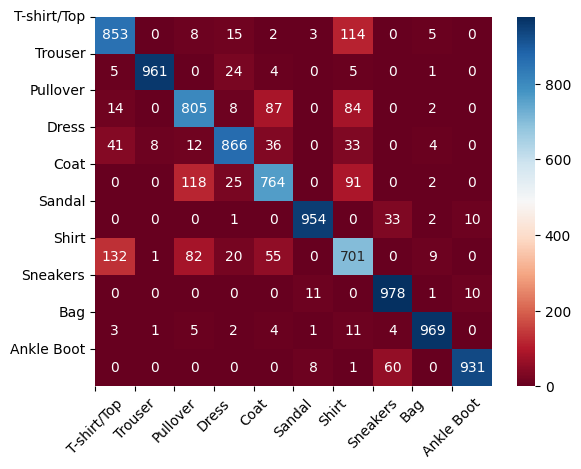

In [ ]:
sns.heatmap(confusion_matrix(y_test,ypred_label),annot=True,fmt='d',cmap='RdBu')
plt.xticks(range(10),label_names,rotation=45)
plt.yticks(range(10),label_names,rotation='horizontal')
plt.show()

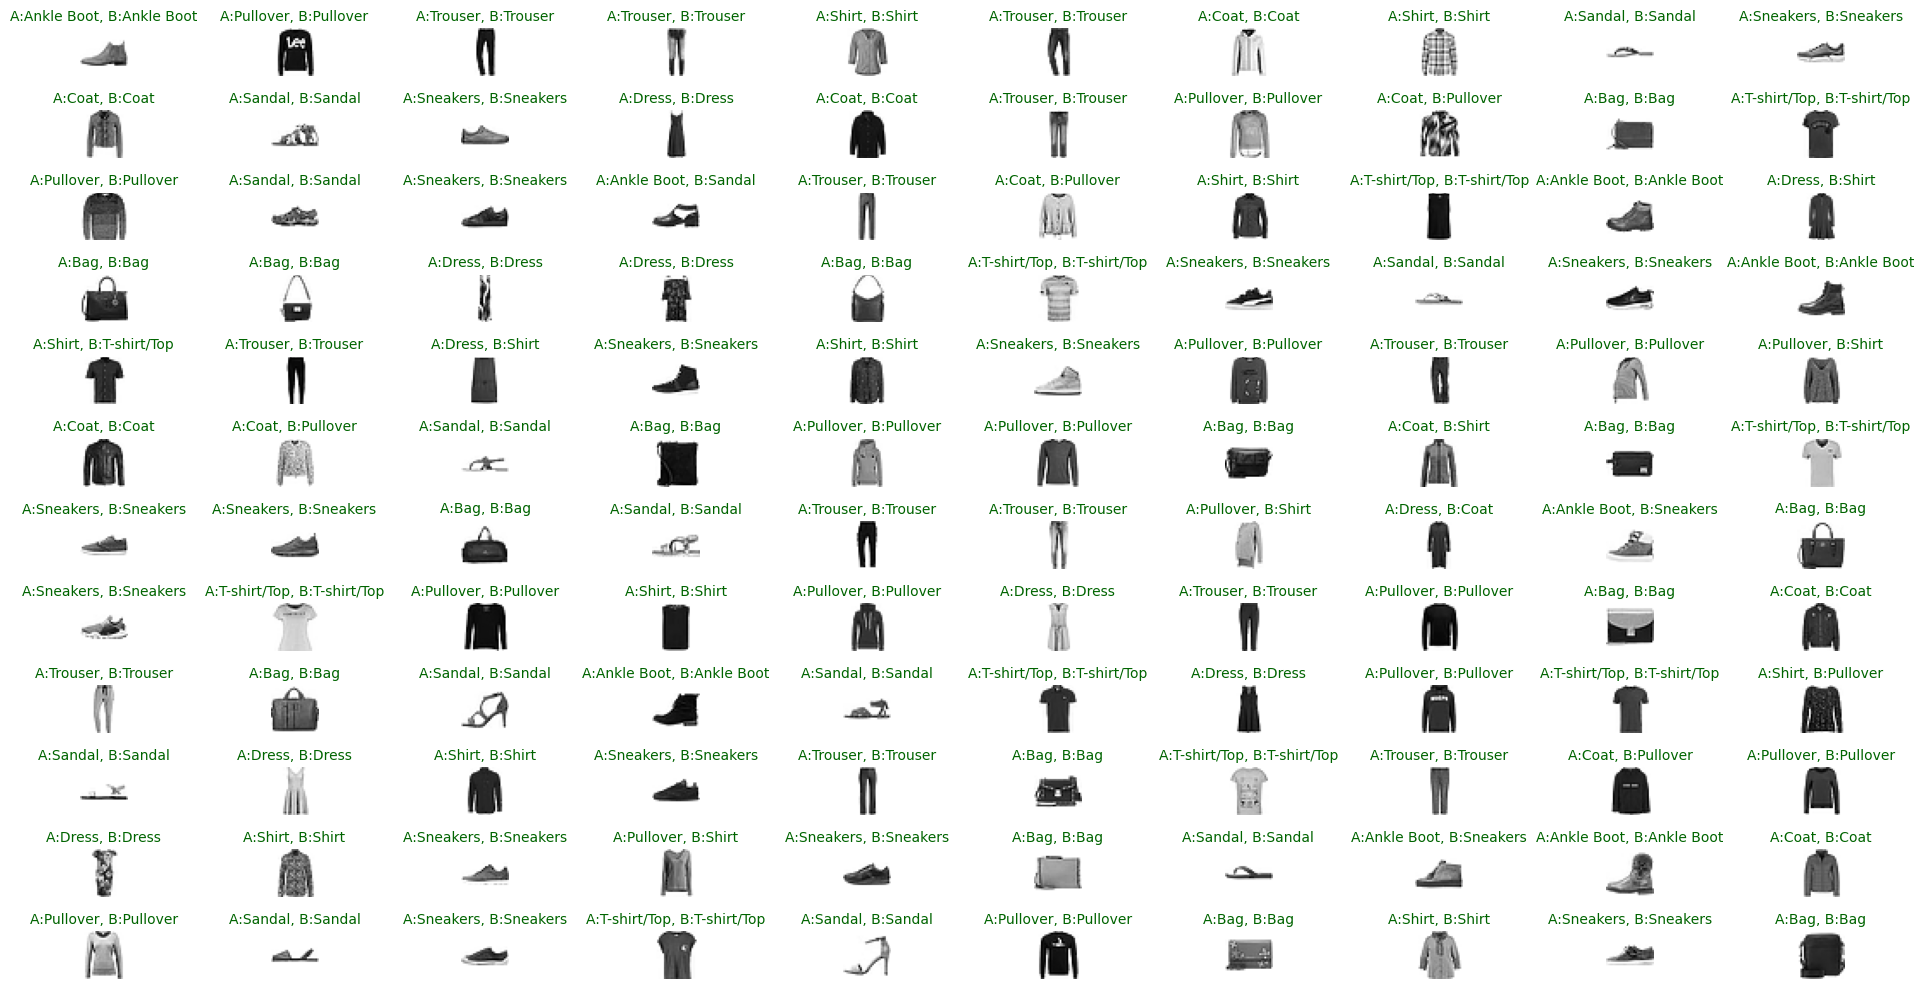

In [ ]:
# See the images

nrows = 12
ncols = 10
t = 1
plt.figure(figsize=(20,10))
for i in range(nrows*ncols):
  plt.subplot(nrows,ncols,t)
  plt.imshow(x_test[i],cmap='binary')
  color = 'red' if y_test[i]!= ypred_label[i] else 'darkgreen'
  plt.title(f'A:{label_names[y_test[i]]}, B:{label_names[ypred_label[i]]}',color='darkgreen',fontsize=10)
  plt.axis('off')
  t+=1
plt.tight_layout()
plt.show()